##### Lehrstuhl für Analytics and Statistics (IOR)
##### Prof. Dr. Oliver Grothe
##### WS 2024/25


# Multivariate Verfahren
## Übung 8

### Aufgabe 5

Verwenden Sie den Datensatz *`psi.csv`* aus Ilias. Der Datensatz enthält Werte einer
Studie zu Schülern im Bildungssystem PSI (Personalized System of Instruction). 

Schätzen Sie ein Logit-Modell auf der abhängigen Variablen ,,GRADE”, die angibt, ob sich die Note
des Schülers verbessert hat (Kodierung 1) oder nicht (Kodierung 0). Verwenden Sie als Regressoren
einen konstanten Term, sowie die Variablen ,,PSI” (Dummyvariable zur Teilnahme
am PSI), ,,TUCE” (Resultate eines Vortests) und ,,GPA” (Grade Point Average, entspricht
der deutschen Abiturnote).


#### Datenvorbereitung

- Daten einlesen:

In [4]:
import numpy as np
import pandas as pd
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
df = pd.read_csv("psi.csv",sep=',',header=None)
df.columns=['GRADE', 'PSI', 'TUCE', 'GPA']
df[:10]

,GRADE,PSI,TUCE,GPA
0,0,0,20,2.66
1,0,0,22,2.89
2,0,0,24,3.28
3,0,0,12,2.92
4,1,0,21,4.00
5,0,0,17,2.86
6,0,0,17,2.76
7,0,0,21,2.87
8,0,0,25,3.03
9,1,0,29,3.92


-  Eine konstante Spalte in Regressoren hinzufügen

In [5]:
import statsmodels.api as sm
data=pd.DataFrame.to_numpy(df.iloc[:,1:])
X=sm.add_constant(data)
X[:10]

array([[ 1.  ,  0.  , 20.  ,  2.66],
       [ 1.  ,  0.  , 22.  ,  2.89],
       [ 1.  ,  0.  , 24.  ,  3.28],
       [ 1.  ,  0.  , 12.  ,  2.92],
       [ 1.  ,  0.  , 21.  ,  4.  ],
       [ 1.  ,  0.  , 17.  ,  2.86],
       [ 1.  ,  0.  , 17.  ,  2.76],
       [ 1.  ,  0.  , 21.  ,  2.87],
       [ 1.  ,  0.  , 25.  ,  3.03],
       [ 1.  ,  0.  , 29.  ,  3.92]])

- Regressand: Grade value

In [7]:
gd = np.array(df.iloc[:, 0])
gd[:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

- Plot Daten markiert mit Grade

In [8]:
data_1 = X[gd == 1] # Schüler mit verbessert Note 
data_0 = X[gd == 0] # Schüler mit nicht verbessert Note 

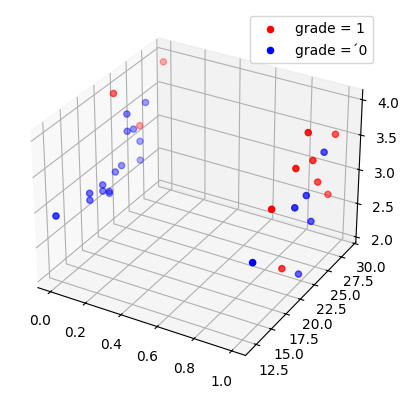

In [9]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(data_1[:,1],data_1[:,2],data_1[:,3],c='red',label='grade = 1')
ax.scatter(data_0[:,1],data_0[:,2],data_0[:,3],c='blue',label='grade =´0')
ax.view_init(None, 300)
ax.legend(loc='upper right')
plt.show()

#### Logistische Regression

- manuelle Schätzung der Parameter

In [10]:
# caculate per hand (mle)
from scipy.optimize import fmin
from numpy import exp,log,sum

def logcdf(x):
    y = exp(x)/(1+exp(x))
    return y

def negloglike(b,x,y):
    likeli = logcdf(np.multiply(np.transpose(2*y-1),np.dot(x,b)))
    ll = sum(log(likeli))
    return -ll

beta_logit = fmin(negloglike,x0=np.array([1,1,1,1]), args=(X,gd))


Optimization terminated successfully.
         Current function value: 12.889634
         Iterations: 257
         Function evaluations: 432


Die geschätzten Koeffizienten $\hat{\beta}$

In [11]:
beta_logit

array([-13.02136302,   2.37869558,   0.09515761,   2.82611797])

Die minimierte negative Loglikelihood

In [12]:
ll_logit = negloglike(beta_logit,X,gd)
ll_logit

12.8896342222045